### Introduction to Geospatial Data in Python
https://www.datacamp.com/community/tutorials/geospatial-data-python
Packages requirements

The packages below installed.

    Pandas: provide data structures and data analysis tools
    Numpy: a fundamental package for scientific computing with Python
    SciPy:(pronounced “Sigh Pie”) is a Python-based ecosystem of open-source software for mathematics, science, and engineering
    RTree: a ctypes Python wrapper of libspatialindex that provides a number of advanced spatial indexing features
    GDAL: translator library for raster and vector geospatial data formats
    Fiona: Fiona reads and writes spatial data files
    Shapely: Geometric objects, predicates, and operations
    GeoPandas: extends the datatypes used by pandas to allow spatial operations on geometric types.
    PySAL: a library of spatial analysis functions written in Python intended to support the development of high-level applications.
    Matplotlib: Python 2D plotting library
    Missingno: Missing data visualization module for Python

Install all the packages following the order above to ensure everything worked. Some packages are pre-requisites for the others, for example: to install GeoPandas, it requires Shapely, and to install Shapely; RTree, GDAL, and Fiona should be installed. The easiest way to install a package is: pip install PACKAGE_NAME

If you are using Windows and can't install the package that way, check this website to download the related packages and do pip install PATH_TO_PACKAGE.
'''

In [37]:
# Load all importance packages
import geopandas
import numpy as np
import pandas as pd
from shapely.geometry import Point

import missingno as msn
import descartes

import seaborn as sns
import matplotlib.pyplot as plt

% matplotlib inline

In [38]:
# Getting to know GEOJSON file:
country = geopandas.read_file("data_test/gz_2010_us_040_00_5m.json")
country.head()

,GEO_ID,STATE,NAME,LSAD,CENSUSAREA,geometry
0,0400000US01,01,Alabama,,50645.326,"MULTIPOLYGON (((-88.12466 30.28364, -88.08681 ..."
1,0400000US02,02,Alaska,,570640.950,"MULTIPOLYGON (((-166.10574 53.98861, -166.0752..."
2,0400000US04,04,Arizona,,113594.084,"POLYGON ((-112.53859 37.00067, -112.53454 37.0..."
3,0400000US05,05,Arkansas,,52035.477,"POLYGON ((-94.04296 33.01922, -94.04304 33.079..."
4,0400000US06,06,California,,155779.220,"MULTIPOLYGON (((-122.42144 37.86997, -122.4213..."


In [42]:
# test numpy library 
my_array = np.array([[1,2,3,4], [5,6,7,8]], dtype=np.int64)
print(my_array)

[[1 2 3 4]
 [5 6 7 8]]


In [39]:
type(country)

geopandas.geodataframe.GeoDataFrame

In [13]:
type(country.geometry)

geopandas.geoseries.GeoSeries

In [14]:
# Each value in the GeoSeries is a Shapely Object. It can be:
type(country.geometry[0])

shapely.geometry.multipolygon.MultiPolygon

Similar to a Pandas DataFrame, a GeoDataFrame also has attribute plot, which makes use of the geometry character within the dataframe to plot a map:

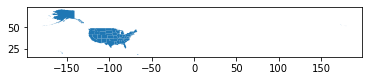

In [15]:
country.plot()

As you may see, the US map is relatively small compared to the frame. It's because the information includes Alaska, Hawaii and Puerto Rico, which spread out around. For this tutorial purpose, you can exclude Alaska and Hawaii as the hurricane did not go anywhere near those two states. You can also add the figure size and color to customize your own plot:

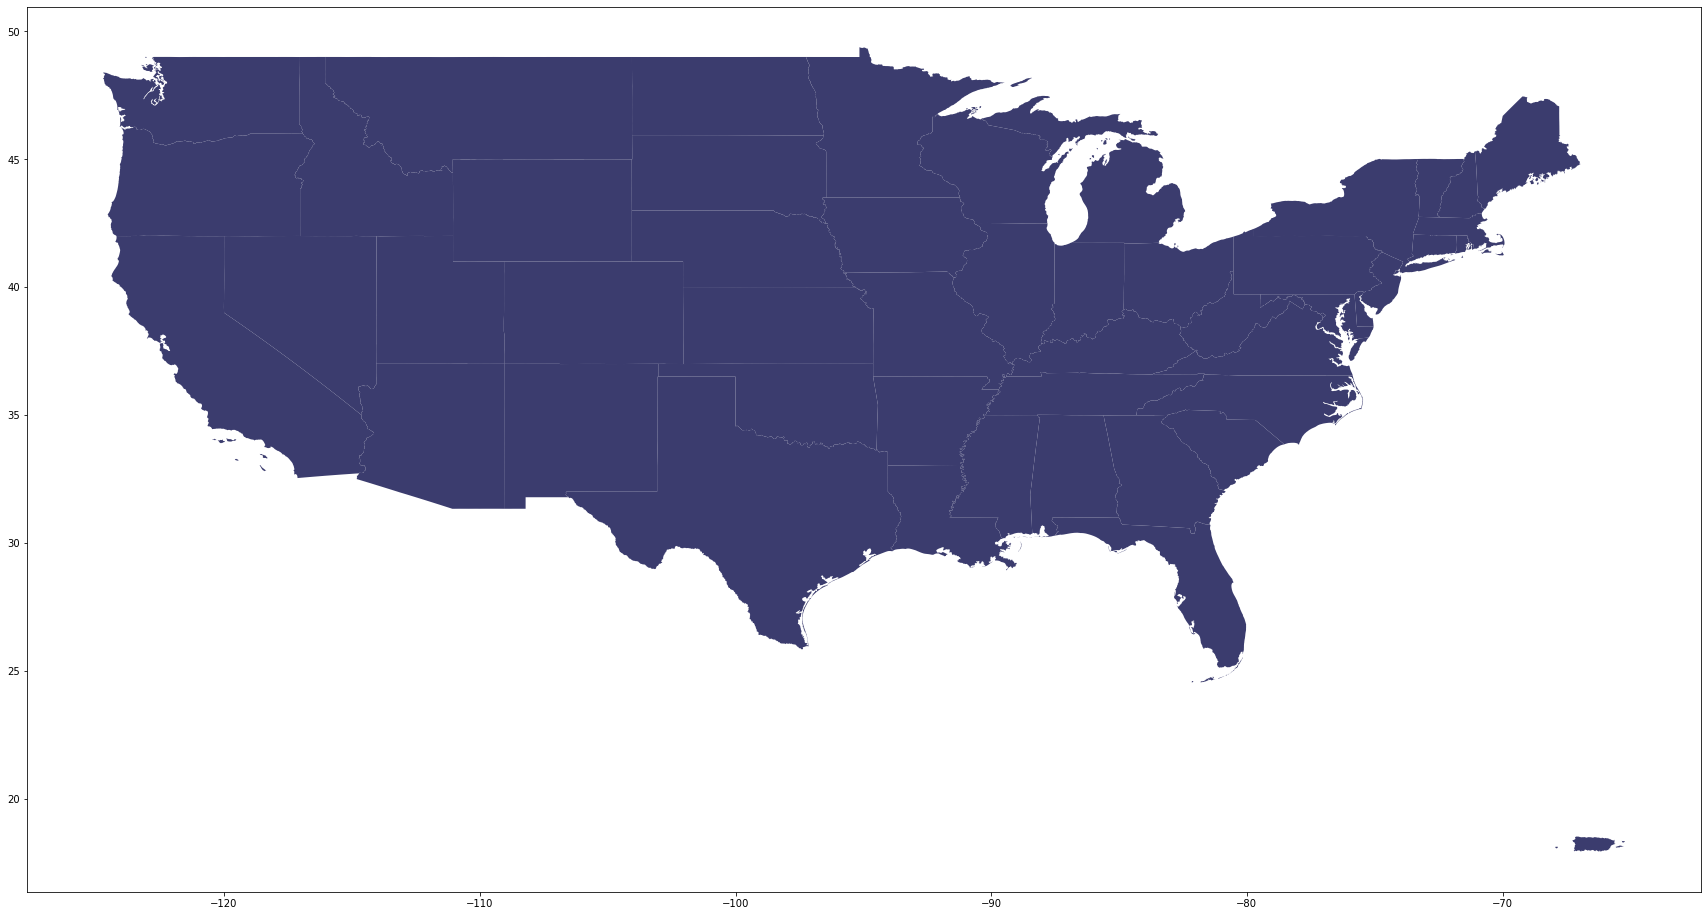

In [16]:
# Exclude Alaska and Hawaii for now
country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(figsize=(30,20), color='#3B3C6E');

In [17]:
# data fromhttp://flhurricane.com/cyclone/stormhistory.php?p=1&year=2018&storm=6
florence = pd.read_csv('data_test/florence.csv')
florence.head()

,AdvisoryNumber,Date,Lat,Long,Wind,Pres,Movement,Type,Name,Received,Forecaster
0,1,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 10:45,Avila
1,1A,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 13:36,Avila
2,2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 16:36,Avila
3,2A,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 19:44,Beven
4,3,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,08/30/2018 22:42,Beven


## Exploratory Data Analysis

This is always the first thing you do when loading any dataset:

    Checking the information, data type
    Any missing value
    Statistical data


In [18]:
florence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AdvisoryNumber  105 non-null    object 
 1   Date            105 non-null    object 
 2   Lat             105 non-null    float64
 3   Long            105 non-null    float64
 4   Wind            105 non-null    int64  
 5   Pres            105 non-null    int64  
 6   Movement        105 non-null    object 
 7   Type            105 non-null    object 
 8   Name            105 non-null    object 
 9   Received        105 non-null    object 
 10  Forecaster      104 non-null    object 
dtypes: float64(2), int64(2), object(7)
memory usage: 9.1+ KB


Checking missing values using the missingno package. This is a useful package using visualization to show missing data. As you can see below, there's only one missing value in the column "Forecaster" which you don't need for this tutorial. So you can ignore it for now

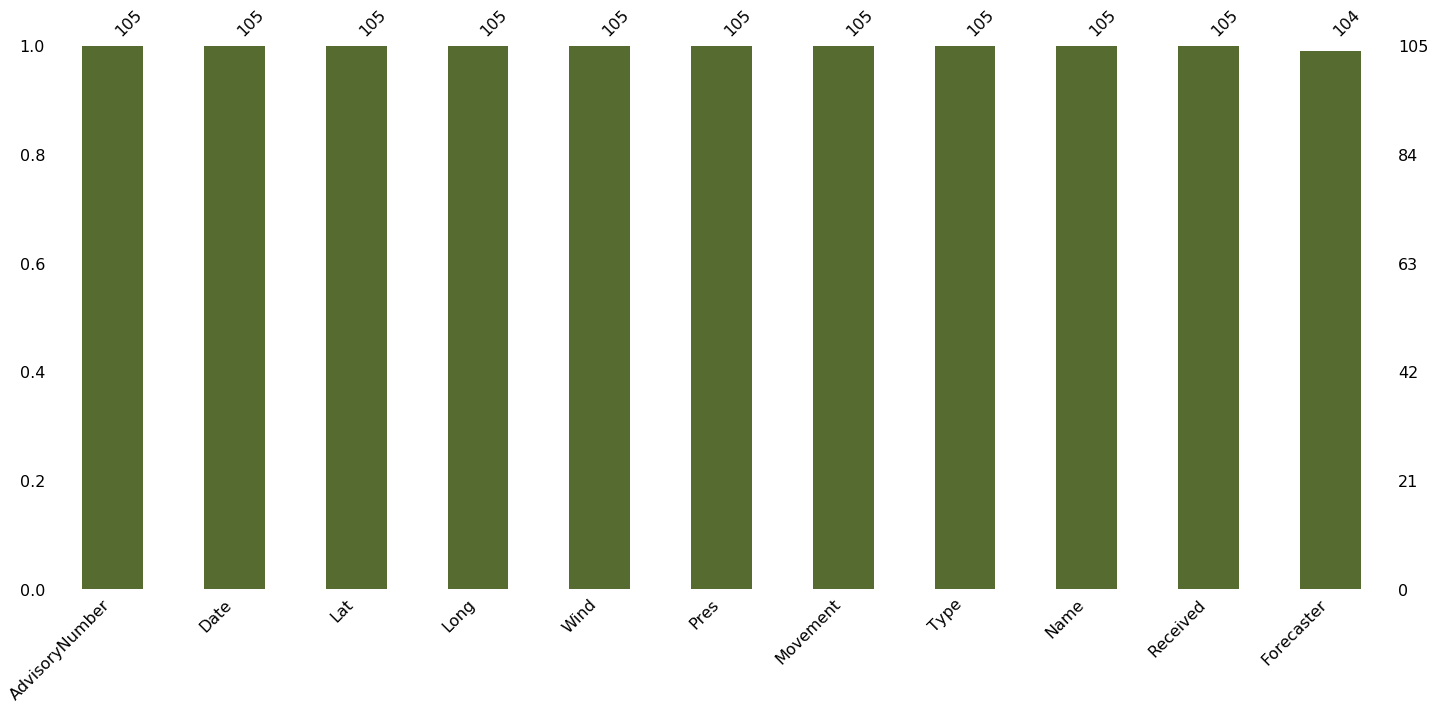

In [19]:
# Notice you can always adjust the color of the visualization
msn.bar(florence, color='darkolivegreen');

Take a look at some statistical information, some could be very useful such as mean wind speed, maximum and minimum wind speed of this hurricane, etc.

In [20]:
# Statistical information
florence.describe()

,Lat,Long,Wind,Pres
count,105.000000,105.000000,105.000000,105.000000
mean,25.931429,56.938095,74.428571,981.571429
std,7.975917,20.878865,36.560765,22.780667
min,12.900000,18.400000,25.000000,939.000000
25%,18.900000,41.000000,40.000000,956.000000
50%,25.100000,60.000000,70.000000,989.000000
75%,33.600000,76.400000,105.000000,1002.000000
max,42.600000,82.900000,140.000000,1008.000000


In [21]:
# dropping all unused features:
florence = florence.drop(['AdvisoryNumber', 'Forecaster', 'Received'], axis=1)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


Normally, if you plot the data by itself, there is no need to take extra care for the coordinate. However, if you want it to look similar to how you look on the map, it's important to check on the longitude and latitude. Here the longitude is west, you will need to add "-" in front of the number to correctly plot the data:

In [22]:
# Add "-" in front of the number to correctly plot the data:
florence['Long'] = 0 - florence['Long']
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six


Then you can combine Lattitude and Longitude to create hurricane coordinates, which will subsequently be turned into GeoPoint for visualization purpose.

In [23]:
# Combining Lattitude and Longitude to create hurricane coordinates:
florence['coordinates'] = florence[['Long', 'Lat']].values.tolist()
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-18.4, 12.9]"
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.0, 12.9]"
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,"[-19.4, 12.9]"
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.4, 13.1]"
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,"[-20.9, 13.2]"


In [24]:
# Change the coordinates to a geoPoint
florence['coordinates'] = florence['coordinates'].apply(Point)
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.4 12.9)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19 12.9)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.4 12.9)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.4 13.1)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.9 13.2)


Checking the type of the florence dataframe and column coordinates of florence data. It's pandas DataFrame and pandas Series.

In [25]:
type(florence)

pandas.core.frame.DataFrame

In [26]:
type(florence['coordinates'])

pandas.core.series.Series

After converting the data into geospatial data, we will check the type of florence dataframe and column coordinates of Florence data again. Now it's Geo DataFrame and GeoSeries.

In [28]:
# Convert the count df to geodf
florence = geopandas.GeoDataFrame(florence, geometry='coordinates')
florence.head()

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)


In [29]:
type(florence)

geopandas.geodataframe.GeoDataFrame

In [30]:
type(florence['coordinates'])

geopandas.geoseries.GeoSeries

Notice that even though it's now a Geo DataFrame and Geo Series, it still behaves like a normal DataFrame and a Series. This means you can still perform filtering, groupby for the dataframe or extract the min, max, or mean values of the column.

In [31]:
# Filtering from before the hurricane was named.
florence[florence['Name']=='Six']

,Date,Lat,Long,Wind,Pres,Movement,Type,Name,coordinates
0,08/30/2018 11:00,12.9,-18.4,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-18.40000 12.90000)
1,08/30/2018 14:00,12.9,-19.0,30,1007,W at 12 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.00000 12.90000)
2,08/30/2018 17:00,12.9,-19.4,30,1007,W at 9 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-19.40000 12.90000)
3,08/30/2018 20:00,13.1,-20.4,30,1007,W at 11 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.40000 13.10000)
4,08/30/2018 23:00,13.2,-20.9,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-20.90000 13.20000)
5,08/31/2018 02:00,13.4,-21.2,35,1007,W at 13 MPH (280 deg),Potential Tropical Cyclone,Six,POINT (-21.20000 13.40000)
6,08/31/2018 05:00,13.6,-21.4,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.40000 13.60000)
7,08/31/2018 08:00,13.7,-21.8,35,1006,WNW at 12 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-21.80000 13.70000)
8,08/31/2018 11:00,13.7,-22.7,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-22.70000 13.70000)
9,08/31/2018 14:00,13.8,-23.3,35,1006,WNW at 13 MPH (285 deg),Potential Tropical Cyclone,Six,POINT (-23.30000 13.80000)


In [32]:
# Groupping by name to see how many names it has in the data set:
florence.groupby('Name').Type.count()

Name
FLORENCE     6
Florence    85
SIX          4
Six         10
Name: Type, dtype: int64

In [33]:
print("Mean wind speed of Hurricane Florence is {} mph and it can go up to {} mph maximum".format(round(florence.Wind.mean(),4),
                                                                                         florence.Wind.max()))

Mean wind speed of Hurricane Florence is 74.4286 mph and it can go up to 140 mph maximum


### Visualization

Similar to pandas Dataframe, a GeoDataFrame also has .plot attribute. However, this attribute makes use of the coordinate within the GeoDataFrame to map it out. Let's take a look:

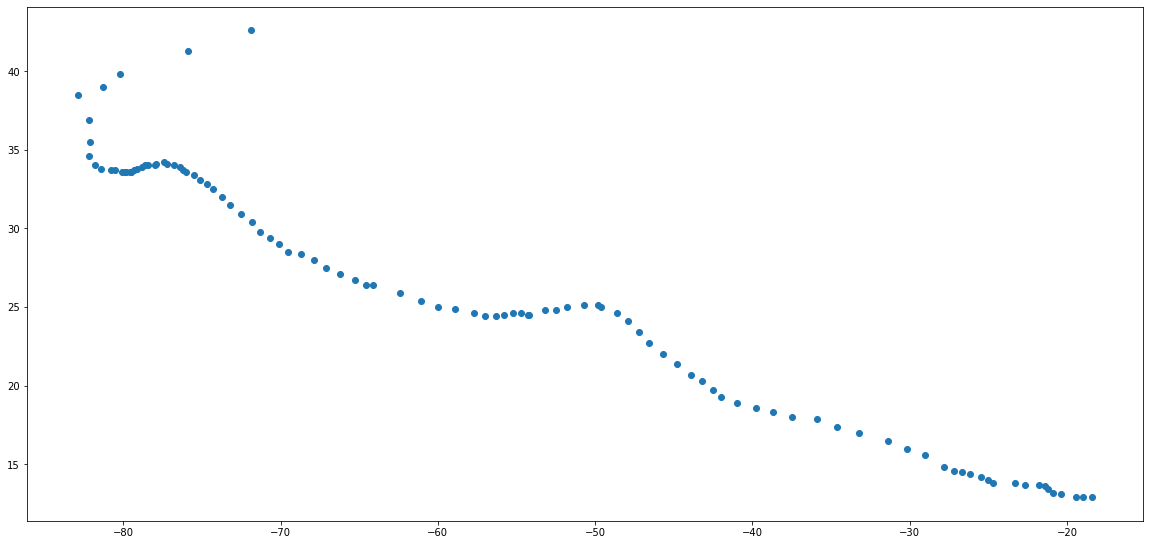

In [34]:
florence.plot(figsize=(20,10));

What happened? All you can see is a bunch of points with no navigation. Is there anything wrong?
No, it's all fine. Because this dataframe only have coordinates information (location) of hurricane Florence at each time point, we can only plot the position on a blank map.

So, the next step is plotting the hurricane position on the US map to see where it hit and how strong it was at that time. To do so, you will use the US map coordinates (data we loaded in the beginning) as the base and plotting hurricane Florence position on top of it.

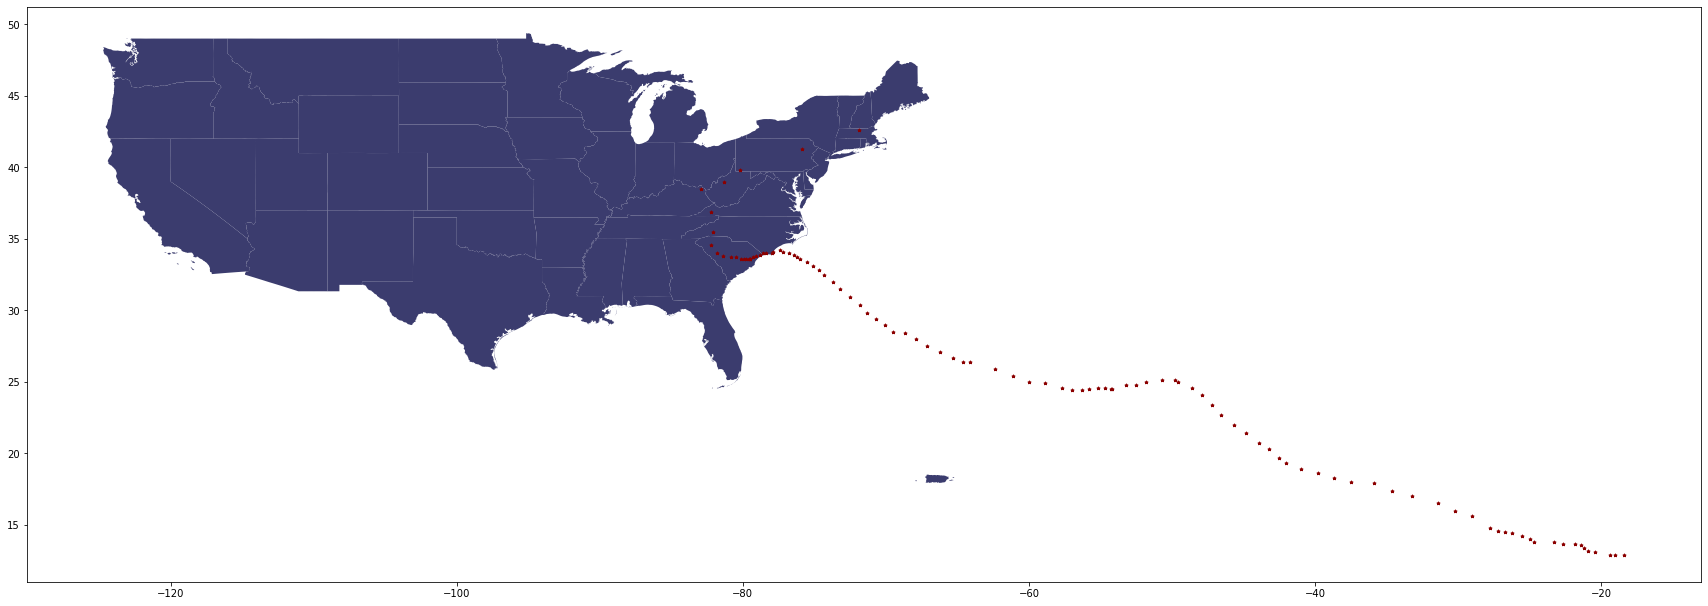

In [35]:
# Plotting to see the hurricane overlay the US map:
fig, ax = plt.subplots(1, figsize=(30,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')

# plotting the hurricane position on top with red color to stand out:
florence.plot(ax=base, color='darkred', marker="*", markersize=10);

Looks great! Now, we will finish it with more details such as:

    Adding title
    Color the hurricane position based on the wind speed to see how strong the hurricane was when it hit each city.
    Remove axis
    Add legend
    Saving the result to an image file to use later


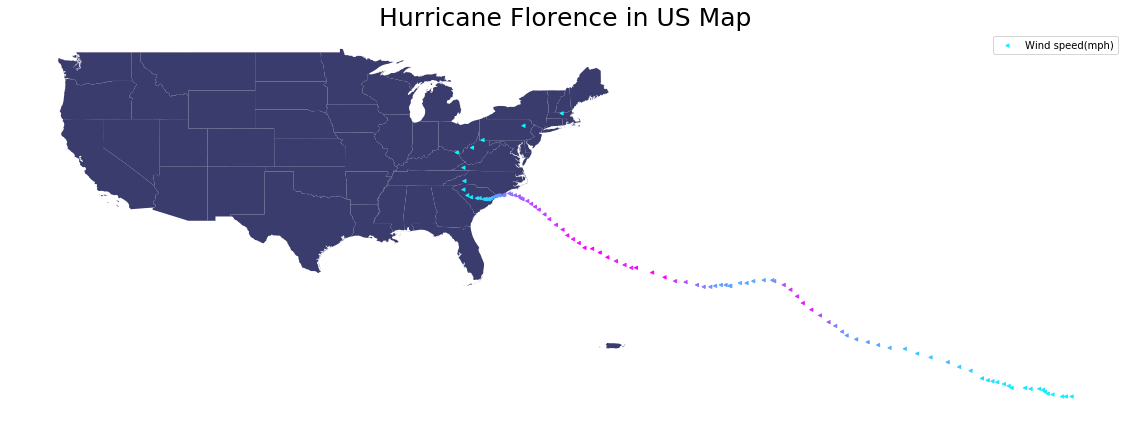

In [36]:
fig, ax = plt.subplots(1, figsize=(20,20))
base = country[country['NAME'].isin(['Alaska','Hawaii']) == False].plot(ax=ax, color='#3B3C6E')
florence.plot(ax=base, column='Wind', marker="<", markersize=10, cmap='cool', label="Wind speed(mph)")
_ = ax.axis('off')
plt.legend()
ax.set_title("Hurricane Florence in US Map", fontsize=25)
plt.savefig('Hurricane_footage.png',bbox_inches='tight');